In [1]:
# Be sure to have installed pandas_datareader in bash shell 
# If you receive error message, ModuleNotFoundError: No module named 'pandas_datareader',
# then you need to pip install pandas_datareader

In [2]:
import pandas_datareader
from pandas_datareader import data
import matplotlib.pyplot as plot
import pandas as pd
path = 'D:/stat_with_python/data/'

In [3]:
# Only get the adjusted close.
netflix = data.DataReader("NFLX", 
                       start='2009-1-1', 
                       end='2020-01-31', 
                       data_source='yahoo')['Adj Close']

nf = pd.DataFrame(netflix)
nf.to_csv(path+'netflix.csv')

In [4]:
# Read in saved data, this will be in pandas dataframe format
netflix = pd.read_csv(path+'netflix.csv')
netflix.head()

,Date,Adj Close
0,2008-12-31,4.270000
1,2009-01-02,4.267143
2,2009-01-05,4.562857
3,2009-01-06,4.705714
4,2009-01-07,4.672857


In [5]:
netflix.tail()

,Date,Adj Close
2785,2020-01-27,342.880005
2786,2020-01-28,348.519989
2787,2020-01-29,343.160004
2788,2020-01-30,347.739990
2789,2020-01-31,345.089996


In [6]:
# Set datetime
from datetime import datetime
netflix['Date'] = pd.to_datetime(netflix['Date'])

In [7]:
# Set index
netflix.set_index('Date', inplace = True)
netflix.head()

,Adj Close
Date,
2008-12-31,4.270000
2009-01-02,4.267143
2009-01-05,4.562857
2009-01-06,4.705714
2009-01-07,4.672857


In [8]:
# Take a look at various fonts, lines, styles for matplotlib
print(plot.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


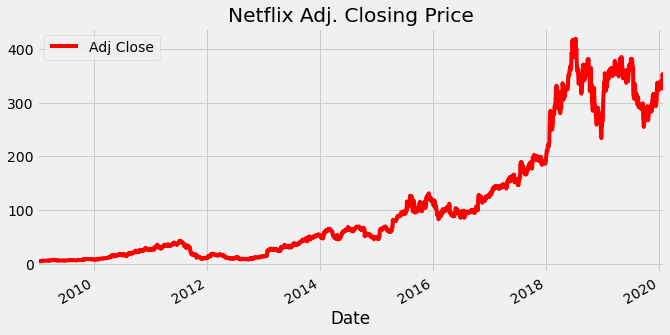

In [9]:
plot.style.use('fivethirtyeight')
netflix.plot(title='Netflix Adj. Closing Price', figsize=(10,5), color='red')
plot.show()

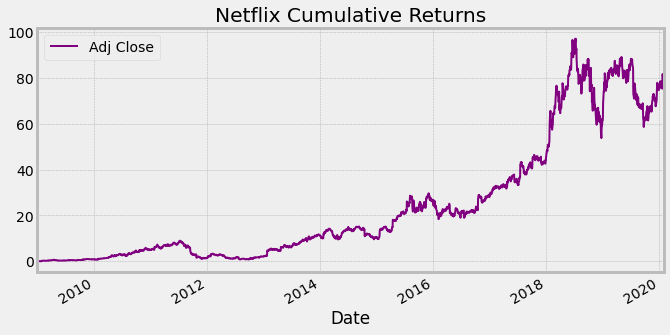

In [10]:
# Convert the adjusted closing prices to cumulative returns.

# Take percentage change of stock price of Netflix
returns = netflix.pct_change()

# Calculate the cumulative product
#  In cumulative product, the length of returned series is same as input series and every element is equal 
# to the product of current and all previous values.

plot.style.use('bmh')
((1 + returns).cumprod() - 1).plot(title='Netflix Cumulative Returns', figsize=(10,5), color='purple')

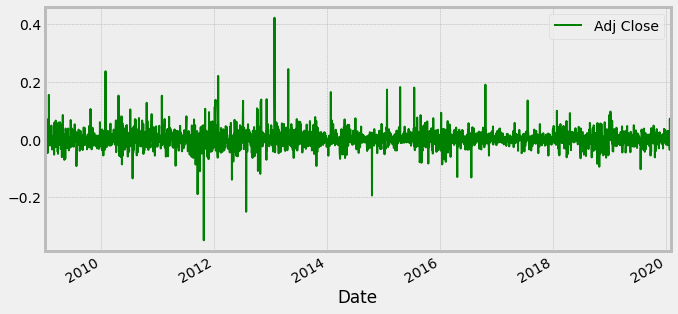

In [11]:
# Plot the returns, which is the percentage change in adjusted closing price

plot.style.use('tableau-colorblind10')
netflix.pct_change().plot(figsize=(10,5), color = 'green');

### Getting Data Using API Key 

In [12]:
# source:  https://github.com/RomelTorres/alpha_vantage
# source:  https://alpha-vantage.readthedocs.io/en/latest/
# You will need to obtain a free API key from Alpha Vantage by
# going to https://www.alphavantage.co/


# In bash shell, type command below: 

# pip install alpha_vantage

In [15]:
# Pull intraday data, example using Disney stock
# Time serie Anlysis : https://sanjayjsw05.medium.com/time-series-analysis-complete-tutorial-for-beginners-part-1-58523000a0a3
from alpha_vantage.timeseries import TimeSeries #https://www.alphavantage.co/
my_API_Key = " AE3I19E4RPGA1ABP"

# ts = TimeSeries(key='YOUR_API_KEY_HERE')
ts = TimeSeries(key='HFWBAPPJ4B2C968U')

# Get json object with the intraday data and another with  the call's metadata
# Use "DIS" for Disney or fill in a stock ticker of your choice
data, meta_data = ts.get_intraday('DIS')

In [16]:
# Take a look at data structure
data

{'2021-02-16 20:00:00': {'1. open': '185.3100',
  '2. high': '185.4000',
  '3. low': '185.0000',
  '4. close': '185.0000',
  '5. volume': '3244'},
 '2021-02-16 19:45:00': {'1. open': '185.3101',
  '2. high': '185.4000',
  '3. low': '185.3100',
  '4. close': '185.4000',
  '5. volume': '2635'},
 '2021-02-16 19:30:00': {'1. open': '185.5000',
  '2. high': '185.5000',
  '3. low': '185.2200',
  '4. close': '185.3000',
  '5. volume': '1813'},
 '2021-02-16 19:15:00': {'1. open': '185.5600',
  '2. high': '185.7000',
  '3. low': '185.5100',
  '4. close': '185.5600',
  '5. volume': '1097'},
 '2021-02-16 19:00:00': {'1. open': '185.7300',
  '2. high': '186.0000',
  '3. low': '185.7000',
  '4. close': '185.7000',
  '5. volume': '1576'},
 '2021-02-16 18:45:00': {'1. open': '185.9500',
  '2. high': '186.0500',
  '3. low': '185.7000',
  '4. close': '185.7200',
  '5. volume': '1498'},
 '2021-02-16 18:30:00': {'1. open': '185.7700',
  '2. high': '185.7700',
  '3. low': '185.7700',
  '4. close': '185.77

In [17]:
# Reformat data
# The data frame structure is given by the call on alpha vantage rest API. 
# The column names of the data frames are the ones given by their data structure.

from alpha_vantage.timeseries import TimeSeries
from pprint import pprint

# ts = TimeSeries(key='YOUR_API_KEY_HERE', output_format='pandas')
ts = TimeSeries(key='HFWBAPPJ4B2C968U', output_format='pandas')

# Use 'DIS' for Disney
data, meta_data = ts.get_intraday(symbol='DIS',interval='1min', outputsize='full')
pprint(data.head(10))

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-02-16 20:00:00   185.05   185.05  185.00    185.00      813.0
2021-02-16 19:59:00   185.21   185.21  185.21    185.21      167.0
2021-02-16 19:58:00   185.30   185.30  185.30    185.30      320.0
2021-02-16 19:57:00   185.21   185.21  185.21    185.21      226.0
2021-02-16 19:53:00   185.40   185.40  185.40    185.40      690.0
2021-02-16 19:52:00   185.25   185.25  185.25    185.25      500.0
2021-02-16 19:51:00   185.31   185.31  185.31    185.31      528.0
2021-02-16 19:42:00   185.40   185.40  185.40    185.40      501.0
2021-02-16 19:39:00   185.31   185.31  185.31    185.31      130.0
2021-02-16 19:37:00   185.40   185.40  185.40    185.40     1001.0


In [18]:
# We can also plot crypto currencies prices like Bitcoin

from alpha_vantage.cryptocurrencies import CryptoCurrencies

cc = CryptoCurrencies(key='HFWBAPPJ4B2C968U', output_format='pandas')

data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')

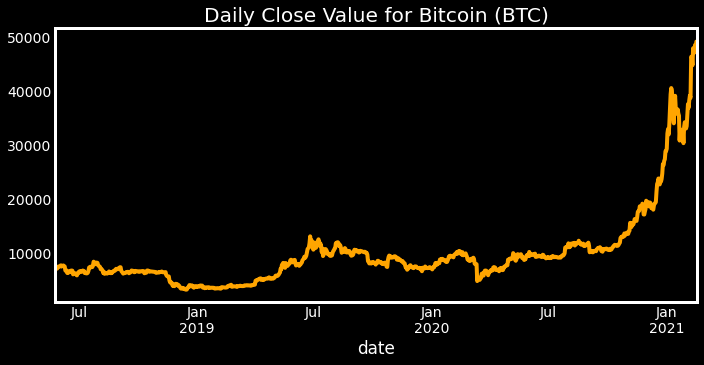

In [19]:
# Plot the data

plot.style.use('dark_background')
data['4b. close (USD)'].plot(figsize=(10,5), linewidth=4, color='orange')
plot.tight_layout()
plot.title('Daily Close Value for Bitcoin (BTC)')
plot.grid()
plot.show()

## Getting Data by Downloading a File

In [20]:
# Google Trends website, search terms "Golf", "Soccer", "Tennis", "Hockey", and "Baseball"
# Dates:  2004-01 to 2019-11
# Source:  https://trends.google.com/trends/explore?date=all&geo=US&q=Golf,Soccer,Tennis,Hockey,Baseball

# Click on down arrow to download csv file
# Save As "file name here" and choose location to save file
# Open up csv file and take a look at header format of data, column headings, missing values, and number of data

In [22]:
# Read in file
sports = pd.read_csv(path+"sports.csv", skiprows=2)

In [23]:
sports.head()

,Month,Golf: (United States),Soccer: (United States),Tennis: (United States),Hockey: (United States),Baseball: (United States)
0,2004-01,45,21,13,22,24
1,2004-02,50,24,13,23,32
2,2004-03,63,27,15,23,45
3,2004-04,80,29,16,16,53
4,2004-05,82,31,17,14,52


In [24]:
# Reset column names
col_names = ['Month', 'Golf', 'Soccer', 'Tennis', 'Hockey', 'Baseball']

sports.columns = col_names

In [25]:
# verify column names have changed
sports.tail()

,Month,Golf,Soccer,Tennis,Hockey,Baseball
186,2019-07,58,42,17,6,35
187,2019-08,53,25,21,7,29
188,2019-09,39,31,21,10,25
189,2019-10,31,28,10,14,30
190,2019-11,27,27,9,16,17


In [26]:
# check for missing values
sports.isna().sum()

Month       0
Golf        0
Soccer      0
Tennis      0
Hockey      0
Baseball    0
dtype: int64

In [27]:
# Set index
sports.set_index('Month', inplace=True)

In [28]:
# Obtain the descriptive statistics
sports.describe()

,Golf,Soccer,Tennis,Hockey,Baseball
count,191.000000,191.000000,191.000000,191.000000,191.000000
mean,49.387435,28.853403,13.502618,14.879581,34.183246
std,18.247326,8.682073,4.067683,5.916182,14.037279
min,23.000000,17.000000,7.000000,6.000000,13.000000
25%,34.000000,24.000000,11.000000,11.000000,23.500000
50%,48.000000,28.000000,13.000000,15.000000,30.000000
75%,59.000000,32.000000,16.000000,18.000000,48.500000
max,100.000000,84.000000,26.000000,55.000000,61.000000


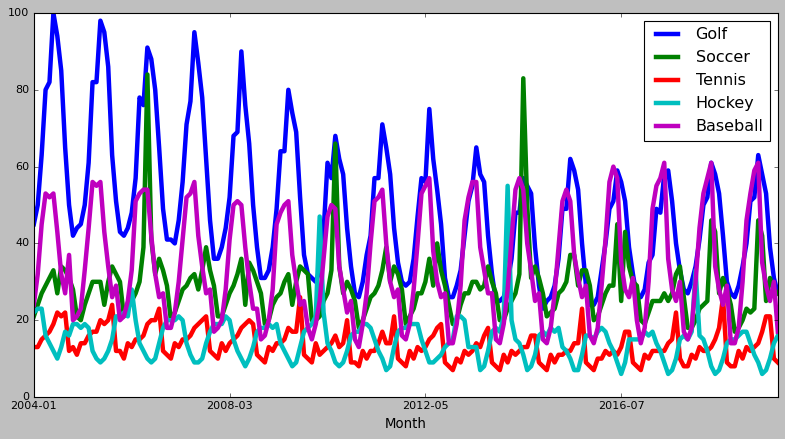

In [29]:
# Plot the multi-time series
plot.style.use('classic')
sports.plot(figsize=(12,6), fontsize=10, linewidth=4)
plot.show();

In [ ]:
# end 